In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.pipeline import Pipeline
import joblib

In [2]:
df = pd.read_csv('Movie_Sentiment_train.tsv', sep='\t')
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


<AxesSubplot:xlabel='Sentiment'>

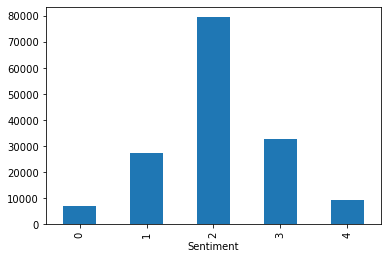

In [3]:
df.groupby("Sentiment").Sentiment.count().plot.bar(ylim=0)

In [4]:
df['Phrase'] = df['Phrase'].str.replace('\d+', '') # remove digits
df['Phrase'] = df['Phrase'].str.replace('[^\w\s]', '') # remove punctuation

In [5]:
X = df['Phrase'] 
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
my_stop_words = ENGLISH_STOP_WORDS.union(['film', 'movie', 'cinema', 'theatre', 'hollywood'])

**LinearSVC-CountVectoization**

In [7]:
text_clf_svc = Pipeline([('vect', CountVectorizer(stop_words=my_stop_words, ngram_range=(1, 3))), ('clf', LinearSVC(max_iter=10000))])

In [8]:
text_clf_svc.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(ngram_range=(1, 3),
                                 stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterwards', 'again',
                                                       'against', 'all',
                                                       'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                                                       'amongst', 'amoungst',
                                                       'amount', 'an', 'and',
                                                       'another', 'any',
                                                       'anyhow', 'anyone',
           

In [9]:
predictions_svc = text_clf_svc.predict(X_test)

In [10]:
#print a Confusion Matrix
print(metrics.confusion_matrix(y_test,predictions_svc))

[[  908  1112   275    43     3]
 [  863  4296  3563   322    17]
 [  218  2227 20964  2443   146]
 [   21   248  4012  5501  1208]
 [    7    19   273  1493  1318]]


In [11]:
# Print a classification report
print(metrics.classification_report(y_test,predictions_svc))

              precision    recall  f1-score   support

           0       0.45      0.39      0.42      2341
           1       0.54      0.47      0.51      9061
           2       0.72      0.81      0.76     25998
           3       0.56      0.50      0.53     10990
           4       0.49      0.42      0.45      3110

    accuracy                           0.64     51500
   macro avg       0.55      0.52      0.53     51500
weighted avg       0.63      0.64      0.63     51500



In [12]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions_svc))

0.6405242718446602


**Naive Bayes-CountVectoization**

In [13]:
text_clf_nb = Pipeline([('vect', CountVectorizer(stop_words=my_stop_words, ngram_range=(1, 3))), ('clf', MultinomialNB())])

In [14]:
text_clf_nb.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(ngram_range=(1, 3),
                                 stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterwards', 'again',
                                                       'against', 'all',
                                                       'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                                                       'amongst', 'amoungst',
                                                       'amount', 'an', 'and',
                                                       'another', 'any',
                                                       'anyhow', 'anyone',
           

In [15]:
predictions_nb = text_clf_svc.predict(X_test)

In [16]:
#print a Confusion Matrix
print(metrics.confusion_matrix(y_test,predictions_nb))

[[  908  1112   275    43     3]
 [  863  4296  3563   322    17]
 [  218  2227 20964  2443   146]
 [   21   248  4012  5501  1208]
 [    7    19   273  1493  1318]]


In [17]:
# Print a classification report
print(metrics.classification_report(y_test,predictions_nb))

              precision    recall  f1-score   support

           0       0.45      0.39      0.42      2341
           1       0.54      0.47      0.51      9061
           2       0.72      0.81      0.76     25998
           3       0.56      0.50      0.53     10990
           4       0.49      0.42      0.45      3110

    accuracy                           0.64     51500
   macro avg       0.55      0.52      0.53     51500
weighted avg       0.63      0.64      0.63     51500



In [18]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions_nb))

0.6405242718446602


**LinearSVC-TFIDF**

In [19]:
text_clf_svc_tf = Pipeline([('vect', TfidfVectorizer(stop_words=my_stop_words, ngram_range=(1, 3))), ('clf', LinearSVC(max_iter=10000))])

In [20]:
text_clf_svc_tf.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(ngram_range=(1, 3),
                                 stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterwards', 'again',
                                                       'against', 'all',
                                                       'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                                                       'amongst', 'amoungst',
                                                       'amount', 'an', 'and',
                                                       'another', 'any',
                                                       'anyhow', 'anyone',
           

In [21]:
predictions_svc_tf = text_clf_svc_tf.predict(X_test)

In [22]:
#print a Confusion Matrix
print(metrics.confusion_matrix(y_test,predictions_svc_tf))

[[  855  1148   301    34     3]
 [  753  4385  3611   298    14]
 [  184  2237 20937  2530   110]
 [   14   262  4067  5586  1061]
 [    5    19   299  1555  1232]]


In [23]:
# Print a classification report
print(metrics.classification_report(y_test,predictions_svc_tf))

              precision    recall  f1-score   support

           0       0.47      0.37      0.41      2341
           1       0.54      0.48      0.51      9061
           2       0.72      0.81      0.76     25998
           3       0.56      0.51      0.53     10990
           4       0.51      0.40      0.45      3110

    accuracy                           0.64     51500
   macro avg       0.56      0.51      0.53     51500
weighted avg       0.63      0.64      0.63     51500



In [24]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions_svc_tf))

0.6406796116504855


**Naive Bayes-TFIDF**

In [25]:
text_clf_nb_tf = Pipeline([('vect', TfidfVectorizer(stop_words=my_stop_words, ngram_range=(1, 3))), ('clf', MultinomialNB())])

In [26]:
text_clf_nb_tf.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(ngram_range=(1, 3),
                                 stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterwards', 'again',
                                                       'against', 'all',
                                                       'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                                                       'amongst', 'amoungst',
                                                       'amount', 'an', 'and',
                                                       'another', 'any',
                                                       'anyhow', 'anyone',
           

In [27]:
predictions_nb_tf = text_clf_nb_tf.predict(X_test)

In [28]:
#print a Confusion Matrix
print(metrics.confusion_matrix(y_test,predictions_nb_tf))

[[  125  1030  1162    24     0]
 [   37  2378  6475   171     0]
 [    4   811 23946  1226    11]
 [    0    94  6517  4305    74]
 [    0    12  1023  1808   267]]


In [29]:
# Print a classification report
print(metrics.classification_report(y_test,predictions_nb_tf))

              precision    recall  f1-score   support

           0       0.75      0.05      0.10      2341
           1       0.55      0.26      0.36      9061
           2       0.61      0.92      0.74     25998
           3       0.57      0.39      0.46     10990
           4       0.76      0.09      0.15      3110

    accuracy                           0.60     51500
   macro avg       0.65      0.34      0.36     51500
weighted avg       0.61      0.60      0.55     51500



In [30]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions_nb_tf))

0.6023495145631068


**Saving and using model**

Note: The Naive Bayes model with TFIDF Vectorization shows a high Precision but poor recall. It also has lowest accuracy at 60%
    Accuracy number were probably skewed by he large number of neutral Sentiment records in the Data set
    
The other models have an accuracy around 64%
However, looking at the confusion matrix, it does look like there are not a lot of egregious misclassifications. (i.e. positives being marked as negative or vice versa). I'm not 100% happy with the model but not totally unhappy either
    

In [36]:
joblib.dump(text_clf_svc, 'SVM_cv_model.pkl')

['SVM_cv_model.pkl']

In [37]:
model = open('SVM_cv_model.pkl','rb')

In [38]:
clf = joblib.load(model)

In [52]:
cv = CountVectorizer()
data = ["plenty of funny quotes but ultimately fell flat","why did Spielberg make this crap?","restores your faith in the world"]
#vect = cv.transform(data).toarray()

In [57]:
new_data = []

for string in data:
    string1 = string.replace('\d+', '') # remove digits
    string1 = string1.replace('[^\w\s]', '') # remove punctuation
    new_data.append(string1)

print(new_data)

['plenty of funny quotes but ultimately fell flat', 'why did Spielberg make this crap?', 'restores your faith in the world']


In [58]:
my_prediction = clf.predict(data)

In [59]:
print(my_prediction)

[1 0 2]
